## Data log 에 관하여 


- Final goal : click 율을 높힐 수 있는 방법을 찾자.

- 1차 목적 : log data 파악 (기준 action_type별로) 

- 1차 질문 : Conversion Rate를 알 수 있는가? 알 수 없음..

        Funnel 별 이탈률 - **DAU 기준**? **Session **기준? 
        * DAU (Daily Active User) / Session(total visit-방문 할 때 마다 증가하는 수치를 의미한다.) 
        

      : 재방문율(retention)은 어떠한가 ? - 동일한 uid를 가지고 있는 사람의 방문수를 분석 
      
      : 분석의 한계점 및 논의/개선 사항에 대하여? 

- 2차 목적 : action_type 별로 행동의 패턴을 세분화하여 시간별 패턴을 파악해보려함. >> 핵심그룹 타겟팅
- 2차 질문 : 상위 10개 지역별 유저의 행동 패턴의 차이? 
         : action_type 에 따른 카테고리별 파악 view 에서 가구수가 많이 찍혔다면, 그 카테고리에 marketing 적인 시도를 할 수 있지 않을까? 
         

* 아하-모먼트 : 사용자가 제품을 사용하면서 가치를 발견하는 순간을 말한다. 
 - A-ha 모먼트를 경험한 유저들을 서비스를 계속 사용하게 되고, 이것을 경험하지 못한 유저가 계속 쓰지 않게 되는 현상. 
 - 아하 모먼트의 기준 : X 라는 행동을 가입한지 Y라는 날짜 안에 Z 번 한다. 

* 상관관계가 아닌 인과관계를 찾는것이 중요하다. - 인과관계 분석 




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline 

In [3]:
filename = '/content/drive/MyDrive/data/a1_factory /data/log_csv.csv'
log = pd.read_csv(filename , index_col = 0, parse_dates = ['collect_time'])

In [4]:
log_cp = log.copy()

In [5]:
log_cp.set_index('collect_time', inplace = True)

In [6]:
log_cp = log_cp.sort_index(ascending=True)
log_cp.head()

,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime
collect_time,,,,,,,,,
2022-12-22 00:00:00,PUiJdmOi9ZcADXtx,View,가구,행거·옷장,행거,Jungnang-gu,Mac OS X,100.0,48015
2022-12-22 00:00:01,ch2Z1WDxeWsADNoO,View,가구,거울,전신거울,Hwaseong-si,Mac OS X,100.0,110654
2022-12-22 00:00:01,Pf2LhGOjGFEADj1W,Highlight,조명,장스탠드,NaN,Seongnam-si,Windows,0.0,0
2022-12-22 00:00:01,2ugHxGMJssgAAxNY,View,수납·정리,옷걸이,바지·치마걸이,Seoul,Android,100.0,222355
2022-12-22 00:00:01,NaN,View,가구,소파,일반소파,Seocho-gu,Android,0.0,0


In [7]:
log_cp['day'] = log_cp.index.day
log_cp['month'] = log_cp.index.month
log_cp

,uid,action_type,category1,category2,category3,geoip_city_name,useragent_os,viewrate,viewtime,day,month
collect_time,,,,,,,,,,,
2022-12-22 00:00:00,PUiJdmOi9ZcADXtx,View,가구,행거·옷장,행거,Jungnang-gu,Mac OS X,100.0,48015,22,12
2022-12-22 00:00:01,ch2Z1WDxeWsADNoO,View,가구,거울,전신거울,Hwaseong-si,Mac OS X,100.0,110654,22,12
2022-12-22 00:00:01,Pf2LhGOjGFEADj1W,Highlight,조명,장스탠드,NaN,Seongnam-si,Windows,0.0,0,22,12
2022-12-22 00:00:01,2ugHxGMJssgAAxNY,View,수납·정리,옷걸이,바지·치마걸이,Seoul,Android,100.0,222355,22,12
2022-12-22 00:00:01,NaN,View,가구,소파,일반소파,Seocho-gu,Android,0.0,0,22,12
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 13:59:59,PWmyWWLCQaIACian,View,가전·디지털,TV,"~109cm(~43"")",Daejeon,Windows,100.0,414,30,12
2022-12-30 13:59:59,yoiUPmOub5YACv3H,View,수납·정리,서랍장·트롤리,트롤리·이동식선반,Seoul,iOS,100.0,24722,30,12
2022-12-30 13:59:59,KlKoJGE9yeEACCVI,View,가구,서랍·수납장,협탁,Gangneung,Windows,100.0,3007,30,12


In [8]:
# 일자별로 uid 중복행을 - 재방문으로 보고 비율 표시 :  Retention을 어떻게 

In [9]:
log_cp.groupby(['uid']).day



In [10]:
# data information 
def df_info(df):
  print('data set information: \n')
  print(df.info())

  print('data set describe check : \n')
  print(df.describe())

df_info(log)


data set information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659541 entries, 0 to 5659540
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   uid              object        
 1   action_type      object        
 2   category1        object        
 3   category2        object        
 4   category3        object        
 5   collect_time     datetime64[ns]
 6   geoip_city_name  object        
 7   useragent_os     object        
 8   viewrate         float64       
 9   viewtime         int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 475.0+ MB
None
data set describe check : 

           viewrate      viewtime
count  5.657112e+06  5.659541e+06
mean   7.677686e+01  5.126022e+04
std    4.221447e+01  5.810345e+05
min    0.000000e+00  0.000000e+00
25%    1.000000e+02  8.940000e+02
50%    1.000000e+02  1.010400e+04
75%    1.000000e+02  4.800500e+04
max    1.000000e+02  8.636989e+

In [11]:
log.isnull().sum()

uid                186313
action_type             0
category1               0
category2               0
category3          780006
collect_time            0
geoip_city_name    417032
useragent_os            0
viewrate             2429
viewtime                0
dtype: int64

In [12]:
log[log.category3.isnull()] #null값의 형태 확인


,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,NaN,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
21,fAWTRWOtPKAABl9P,View,가구,서랍·수납장,NaN,2022-12-29 16:09:37,Seongbuk-gu,Windows,100.0,7036
54,fYx4OGJwcR4AB+zb,View,조명,단스탠드,NaN,2022-12-29 09:32:21,Seongnam-si,Windows,100.0,2377
61,avXJTWNh0KoAATnH,View,노하우,꾸미기팁,NaN,2022-12-29 15:56:42,Paju,Windows,100.0,134250
66,0nWGIGNbMn4ACm6Q,View,노하우,지식백과,NaN,2022-12-29 14:51:55,Jeonju,Windows,100.0,141057
...,...,...,...,...,...,...,...,...,...,...
5659495,2icuqmNMnKMAATWT,View,수납·정리,빨래바구니·햄퍼,NaN,2022-12-28 14:26:18,Seoul,Windows,100.0,43181
5659519,dihYQ2Jp53kABkx/,View,가전·디지털,음향가전,NaN,2022-12-28 12:23:51,Gwangju,Windows,100.0,36011
5659524,Ae06eGOr4WcACDEv,View,주방용품,보관·용기·도시락,NaN,2022-12-28 17:04:42,Gwangju,iOS,100.0,135321
5659526,dCFkG2J3qToAAf3A,View,패브릭,O!STYLING,NaN,2022-12-29 18:51:06,Seoul,iOS,0.0,0


In [13]:
# data 결측값 처리 
log_null_ts = log.copy()
drop_city = log_null_ts[log_null_ts['geoip_city_name'] != 'Seoul']
drop_city = drop_city[drop_city['geoip_city_name'] != 'Gyeonggi-do']


drop_city.isnull().sum().sort_values(ascending=False)

category3          643126
geoip_city_name    417032
uid                132162
viewrate             1722
action_type             0
category1               0
category2               0
collect_time            0
useragent_os            0
viewtime                0
dtype: int64

In [14]:
log_drop_null = drop_city 
log_drop_null['geoip_city_name'].fillna('un_city_name', inplace = True)
log_drop_null['category3'].fillna('un_category', inplace = True)
log_drop_null['uid'].fillna('unname',inplace= True)
log_drop_null.dropna(axis= 0, inplace =True)
print(log_drop_null.isnull().sum().sort_values(ascending=False))

uid                0
action_type        0
category1          0
category2          0
category3          0
collect_time       0
geoip_city_name    0
useragent_os       0
viewrate           0
viewtime           0
dtype: int64


In [15]:
log_drop_null

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5659533,3yfy5mOZpbYAAMpw,View,가전·디지털,주방가전,오븐·전자레인지,2022-12-29 12:45:14,Gangnam-gu,Android,100.0,6054
5659534,qE73wWOr1C8ABhBw,View,캠핑용품,캠핑생활용품,기타캠핑생활용품,2022-12-28 15:40:29,Songpa-gu,Windows,100.0,10006
5659537,PVMstmNg4I4ADq9R,Basket,가구,진열장·책장,책장,2022-12-28 14:30:09,Jinju,Windows,0.0,0
5659538,diRXdmN49dUABrVo,View,가구,테이블·식탁·책상,식탁,2022-12-29 12:45:13,Gunpo,Android,100.0,47217


In [16]:
# uid 의 중복을 없앰
log_new = log_drop_null.drop_duplicates(['uid'])

In [17]:
log_new

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
1,0+5vEmGkOuAAB5j2,Basket,패브릭,매트,주방·다용도매트,2022-12-29 12:56:38,Yongin-si,Windows,0.0,0
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
5,091fXGIDYFEABcpA,Basket,수납·정리,화장대·테이블정리,티슈커버·케이스,2022-12-29 17:53:11,Incheon,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5659447,DiETNWGKOwMADDsp,View,가전·디지털,태블릿PC,태블릿PC,2022-12-28 17:18:27,Yongin-si,Windows,100.0,7572
5659459,amWDVmOr0ycAB/2J,View,가구,테이블·식탁·책상,사이드테이블,2022-12-28 22:12:53,Gangbuk-gu,iOS,100.0,287291
5659462,DiaRu2I60NgACwX7,View,노하우,건축&주택,un_category,2022-12-29 10:54:12,Seongnam-si,Windows,100.0,228039
5659472,0/usD2Os6BcACzMc,View,패브릭,매트리스커버,un_category,2022-12-29 10:07:13,Changwon,Windows,100.0,58595


In [18]:
non_basket = log_new[log_new['action_type'] != 'Basket']
non_basket

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
0,avpKyWMn/xEADNlb,View,주방용품,그릇·홈세트,식판·나눔접시,2022-12-29 17:29:02,Seongnam-si,Windows,100.0,80033
3,dC9Fl2Ly9lcADrTn,Highlight,데코·식물,플라워·식물,화병·화분,2022-12-29 17:54:30,Gwangmyeong-si,Windows,0.0,0
4,09gKcGLg0I8ACyQy,View,가구,진열장·책장,책장,2022-12-29 18:45:05,Jongno-gu,Mac OS X,100.0,1238
6,Adwku2KoPCwAANbw,View,노하우,꾸미기팁,un_category,2022-12-29 09:13:14,Gwanak-gu,Windows,100.0,37161
7,tOQhrWGfQcAACo9B,View,가구,테이블·식탁·책상,책상,2022-12-29 15:32:12,Gangnam-gu,Windows,100.0,8483
...,...,...,...,...,...,...,...,...,...,...
5659447,DiETNWGKOwMADDsp,View,가전·디지털,태블릿PC,태블릿PC,2022-12-28 17:18:27,Yongin-si,Windows,100.0,7572
5659459,amWDVmOr0ycAB/2J,View,가구,테이블·식탁·책상,사이드테이블,2022-12-28 22:12:53,Gangbuk-gu,iOS,100.0,287291
5659462,DiaRu2I60NgACwX7,View,노하우,건축&주택,un_category,2022-12-29 10:54:12,Seongnam-si,Windows,100.0,228039
5659472,0/usD2Os6BcACzMc,View,패브릭,매트리스커버,un_category,2022-12-29 10:07:13,Changwon,Windows,100.0,58595


In [19]:
geo_rank = non_basket.loc[:,'geoip_city_name'].value_counts()[1:10]
geo_rank
# 많이 이용하는 지역 상위 10개 

Busan          30033
Incheon        26633
Daegu          23823
Seongnam-si    18937
Daejeon        18709
Gwangju        17863
Suwon          17087
Yongin-si      16550
Gangnam-gu     14908
Name: geoip_city_name, dtype: int64

In [34]:
geo_rank.index

Index(['Busan', 'Incheon', 'Daegu', 'Seongnam-si', 'Daejeon', 'Gwangju',
       'Suwon', 'Yongin-si', 'Gangnam-gu'],
      dtype='object')

In [ ]:
# 지역 상위 10개 내에서 action_type별 행동 분석 why? 
# 지역별 category 어떤 category의 선호도가 높은지 ? 전체적인 흐름과 비슷한 선호도를 보이고 있는가? 
filter = (non_basket['geoip_city_name'] == 'Busan') & (non_basket['action_type'] =='View') 
busan_view = non_basket[filter]
busan_view

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
27,eZBeZ2GDmxMAA7AM,View,가구,서랍·수납장,수납장,2022-12-29 11:39:18,Busan,Windows,100.0,16164
58,G3VZr2L7PcUACeaU,View,패브릭,홈패브릭,담요·블랭킷,2022-12-29 10:09:17,Busan,Android,100.0,3400
182,0rTXAmOtE08ADdVm,View,가구,서랍·수납장,주방수납장,2022-12-29 13:22:18,Busan,Windows,100.0,11012
191,ei+4MWL+soMADPvJ,View,가구,테이블·식탁·책상,un_category,2022-12-24 23:16:52,Busan,Android,100.0,14031
194,3FSihmNzOpYABmd/,View,먼데이하우스,가구,테이블·식탁·책상,2022-12-26 15:53:22,Busan,Windows,100.0,7036
...,...,...,...,...,...,...,...,...,...,...
5656853,d0Ge1WOtMlAADBp+,View,가구,테이블·식탁·책상,식탁,2022-12-29 15:26:12,Busan,Windows,100.0,12656
5657141,dW8Ou2Kaok0ADtRJ,View,노하우,청소,un_category,2022-12-29 14:18:48,Busan,Android,100.0,42876
5657757,3yfSmWNEAQ4ADes/,View,가구,침대,침대+매트리스,2022-12-28 08:12:16,Busan,Android,0.0,0
5658369,3Y2sYGOrHFMADSmp,View,주방용품,칼·커팅기구,칼세트,2022-12-28 14:43:39,Busan,iOS,100.0,43037


In [ ]:
busan_view['category1'].value_counts()[:10]

가구        8445
가전·디지털    4030
노하우       2649
패브릭       2644
주방용품      2644
데코·식물     2331
생활용품      1363
수납·정리     1043
공구·DIY     793
조명         769
Name: category1, dtype: int64

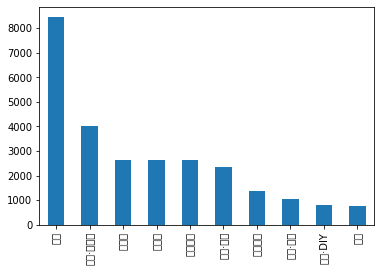

In [ ]:
busan_view['category1'].value_counts()[:10].plot.bar()

In [29]:
# highlight 
filter = (non_basket['geoip_city_name'] == 'Busan') & (non_basket['action_type'] =='Highlight') 
busan_highlight = non_basket[filter]
busan_highlight

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
616,avD3ymNoPuoADcCj,Highlight,생활용품,세탁용품,빨래건조대,2022-12-29 13:38:23,Busan,Windows,0.0,0
955,Oxg1Q2Ho6v0ADE5v,Highlight,주방용품,컵·잔·텀블러,맥주잔,2022-12-22 10:50:48,Busan,Windows,0.0,0
976,duspm2OnOfoAAdRV,Highlight,수납·정리,화장대·테이블정리,소품정리·거치대,2022-12-25 02:42:37,Busan,iOS,0.0,0
1169,ebHacGJiDykADpiC,Highlight,가전·디지털,계절가전,가습기,2022-12-24 13:47:23,Busan,Android,0.0,0
1680,avudWWNGMNkAA1oL,Highlight,가전·디지털,계절가전,공기청정기,2022-12-26 12:23:43,Busan,Windows,0.0,0
...,...,...,...,...,...,...,...,...,...,...
4965035,dCzDimMTNIgADmZI,Highlight,노하우,청소,un_category,2022-12-23 21:33:43,Busan,Windows,0.0,0
5107436,didx8WOr1/UACy6P,Highlight,노하우,수납,un_category,2022-12-28 14:46:08,Busan,iOS,0.0,0
5416668,PU9OpWOm7bUAARgp,Highlight,패브릭,이불·이불솜,이불,2022-12-24 21:21:23,Busan,Windows,0.0,0
5494331,07binWOr7TYAAbG3,Highlight,주방용품,컵·잔·텀블러,와인·양주·칵테일잔,2022-12-28 16:16:42,Busan,iOS,0.0,0


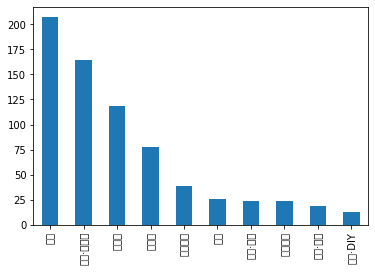

In [31]:
busan_highlight['category1'].value_counts()[:10].plot.bar()

In [ ]:
# action_type별 viewtime의 평균 

list = non_basket['action_type'].value_counts()
act_lst = list.index.to_list()
print(act_lst)
# for act_type in act_lst :
#   view_df = non_basket[non_basket['action_type'] == str(act_lst)]

#   print(view_df['viewtime'].mean())

['View', 'Highlight', 'SINF', 'Copy']


In [ ]:
view_df = non_basket[non_basket['action_type'] == 'View']
view_df['viewtime'].mean()

72942.07208413526

# DAU
 Daily Active User 일일 활성 사용자 수 
 

In [ ]:
type(log['collect_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
log.sort_values(by='collect_time',inplace=True)

In [ ]:
log

,uid,action_type,category1,category2,category3,collect_time,geoip_city_name,useragent_os,viewrate,viewtime
479048,PUiJdmOi9ZcADXtx,View,가구,행거·옷장,행거,2022-12-22 00:00:00,Jungnang-gu,Mac OS X,100.0,48015
132990,ch2Z1WDxeWsADNoO,View,가구,거울,전신거울,2022-12-22 00:00:01,Hwaseong-si,Mac OS X,100.0,110654
3893008,Pf2LhGOjGFEADj1W,Highlight,조명,장스탠드,NaN,2022-12-22 00:00:01,Seongnam-si,Windows,0.0,0
2975277,2ugHxGMJssgAAxNY,View,수납·정리,옷걸이,바지·치마걸이,2022-12-22 00:00:01,Seoul,Android,100.0,222355
185259,NaN,View,가구,소파,일반소파,2022-12-22 00:00:01,Seocho-gu,Android,0.0,0
...,...,...,...,...,...,...,...,...,...,...
5609974,PWmyWWLCQaIACian,View,가전·디지털,TV,"~109cm(~43"")",2022-12-30 13:59:59,Daejeon,Windows,100.0,414
4626649,yoiUPmOub5YACv3H,View,수납·정리,서랍장·트롤리,트롤리·이동식선반,2022-12-30 13:59:59,Seoul,iOS,100.0,24722
5621058,KlKoJGE9yeEACCVI,View,가구,서랍·수납장,협탁,2022-12-30 13:59:59,Gangneung,Windows,100.0,3007
4289497,ea06vWGN40sACAs+,View,가구,테이블·식탁·책상,사이드테이블,2022-12-30 13:59:59,Gimpo-si,Windows,100.0,81011


In [ ]:
min_grouped = log.groupby(['uid'])['collect_time'].min()

In [ ]:
max_grouped = log.groupby(['uid'])['collect_time'].max()

In [ ]:
max_time_df = pd.DataFrame(max_grouped)
max_time_df.columns = ['latest']
max_time_df

,latest
uid,
0++3ZGK1UAwAADb+,2022-12-28 16:12:56
0++N/mCM70sACRof,2022-12-27 09:42:21
0++Nn2OoX4kAAREq,2022-12-25 23:34:49
0+0E1GJwuzsACQ83,2022-12-28 20:01:45
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36
...,...
zyaBomLbW6kABT4Y,2022-12-27 08:33:41
zyaeLmOs57EACT8n,2022-12-29 10:05:15
zyak/GLq3i0ACWBJ,2022-12-30 11:02:31


In [ ]:
min_time_df = pd.DataFrame(min_grouped)
min_time_df.columns = ['start']
min_time_df

,start
uid,
0++3ZGK1UAwAADb+,2022-12-28 15:20:39
0++N/mCM70sACRof,2022-12-27 09:39:13
0++Nn2OoX4kAAREq,2022-12-25 23:34:49
0+0E1GJwuzsACQ83,2022-12-28 19:53:21
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36
...,...
zyaBomLbW6kABT4Y,2022-12-24 10:55:13
zyaeLmOs57EACT8n,2022-12-29 10:05:15
zyak/GLq3i0ACWBJ,2022-12-30 10:56:40


In [ ]:
new_log = pd.concat([max_time_df, min_time_df], axis =1)
new_log

,latest,start
uid,,
0++3ZGK1UAwAADb+,2022-12-28 16:12:56,2022-12-28 15:20:39
0++N/mCM70sACRof,2022-12-27 09:42:21,2022-12-27 09:39:13
0++Nn2OoX4kAAREq,2022-12-25 23:34:49,2022-12-25 23:34:49
0+0E1GJwuzsACQ83,2022-12-28 20:01:45,2022-12-28 19:53:21
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,2022-12-22 11:28:36
...,...,...
zyaBomLbW6kABT4Y,2022-12-27 08:33:41,2022-12-24 10:55:13
zyaeLmOs57EACT8n,2022-12-29 10:05:15,2022-12-29 10:05:15
zyak/GLq3i0ACWBJ,2022-12-30 11:02:31,2022-12-30 10:56:40


In [ ]:
new_log['session_time'] = new_log['latest'] - new_log['start']
new_log

,latest,start,session_time
uid,,,
0++3ZGK1UAwAADb+,2022-12-28 16:12:56,2022-12-28 15:20:39,0 days 00:52:17
0++N/mCM70sACRof,2022-12-27 09:42:21,2022-12-27 09:39:13,0 days 00:03:08
0++Nn2OoX4kAAREq,2022-12-25 23:34:49,2022-12-25 23:34:49,0 days 00:00:00
0+0E1GJwuzsACQ83,2022-12-28 20:01:45,2022-12-28 19:53:21,0 days 00:08:24
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,2022-12-22 11:28:36,0 days 00:00:00
...,...,...,...
zyaBomLbW6kABT4Y,2022-12-27 08:33:41,2022-12-24 10:55:13,2 days 21:38:28
zyaeLmOs57EACT8n,2022-12-29 10:05:15,2022-12-29 10:05:15,0 days 00:00:00
zyak/GLq3i0ACWBJ,2022-12-30 11:02:31,2022-12-30 10:56:40,0 days 00:05:51


#Funnel analysis


reference : https://bigsong.tistory.com/38


In [ ]:
# 다시 한번 불러오기 (basket까지 포함)

In [ ]:
filename = '/content/drive/MyDrive/data/a1_factory /data/log_csv.csv'
log = pd.read_csv(filename , index_col = 0, parse_dates = ['collect_time'])

In [ ]:
log_df = log[['collect_time', 'uid', 'action_type']].copy()

In [ ]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659541 entries, 0 to 5659540
Data columns (total 3 columns):
 #   Column        Dtype         
---  ------        -----         
 0   collect_time  datetime64[ns]
 1   uid           object        
 2   action_type   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 172.7+ MB


In [ ]:
type(log_df['collect_time'][0])
#type이 데이트타임인것을 확인. 


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
log_df.sort_values(by='collect_time',inplace=True)

In [ ]:
log_df

,collect_time,uid,action_type
479048,2022-12-22 00:00:00,PUiJdmOi9ZcADXtx,View
132990,2022-12-22 00:00:01,ch2Z1WDxeWsADNoO,View
3893008,2022-12-22 00:00:01,Pf2LhGOjGFEADj1W,Highlight
2975277,2022-12-22 00:00:01,2ugHxGMJssgAAxNY,View
185259,2022-12-22 00:00:01,NaN,View
...,...,...,...
5609974,2022-12-30 13:59:59,PWmyWWLCQaIACian,View
4626649,2022-12-30 13:59:59,yoiUPmOub5YACv3H,View
5621058,2022-12-30 13:59:59,KlKoJGE9yeEACCVI,View
4289497,2022-12-30 13:59:59,ea06vWGN40sACAs+,View


In [ ]:
grouped = log_df.groupby(['uid','action_type'])['collect_time'].min() # 시간에 대해 최초접속을 기준으로 하기 위해 min으로 정렬
grouped

uid               action_type
0++3ZGK1UAwAADb+  View          2022-12-28 15:20:39
0++N/mCM70sACRof  View          2022-12-27 09:39:13
0++Nn2OoX4kAAREq  View          2022-12-25 23:34:49
0+0E1GJwuzsACQ83  Highlight     2022-12-28 20:01:45
                  View          2022-12-28 19:53:21
                                        ...        
zyaBomLbW6kABT4Y  View          2022-12-24 10:55:13
zyaeLmOs57EACT8n  View          2022-12-29 10:05:15
zyak/GLq3i0ACWBJ  View          2022-12-30 10:56:40
zyaqVGE+vLgABVrg  View          2022-12-23 22:51:01
zybPkmIZYZIACTgu  View          2022-12-29 01:32:30
Name: collect_time, Length: 970714, dtype: datetime64[ns]

In [ ]:
funnel_steps = pd.DataFrame({'steps':[1,2,3]}, index = ['View','Highlight','Basket'])
funnel_steps
# funnel step 을 위한 별도의 데이터 프레임을 생성 (step)
# view -> highlight -> basket   

,steps
View,1
Highlight,2
Basket,3


In [ ]:
grouped = pd.DataFrame(grouped).merge(funnel_steps , left_on = 'action_type', right_index = True)
grouped 

,,collect_time,steps
uid,action_type,,
0++3ZGK1UAwAADb+,View,2022-12-28 15:20:39,1
0++N/mCM70sACRof,View,2022-12-27 09:39:13,1
0++Nn2OoX4kAAREq,View,2022-12-25 23:34:49,1
0+0E1GJwuzsACQ83,View,2022-12-28 19:53:21,1
0+0E1GOjv/8ABjEM,View,2022-12-22 11:28:36,1
...,...,...,...
ytEf/GOauqwABkGu,Basket,2022-12-26 22:34:54,3
ywpjRWMglBcAC53F,Basket,2022-12-25 14:46:38,3
z+2nAl+gbvsAArCl,Basket,2022-12-28 12:36:43,3


In [ ]:
funnel = grouped.reset_index().pivot(index='uid', columns = 'steps', values = 'collect_time')
funnel.columns = funnel_steps.index
funnel

,View,Highlight,Basket
uid,,,
0++3ZGK1UAwAADb+,2022-12-28 15:20:39,NaT,NaT
0++N/mCM70sACRof,2022-12-27 09:39:13,NaT,NaT
0++Nn2OoX4kAAREq,2022-12-25 23:34:49,NaT,NaT
0+0E1GJwuzsACQ83,2022-12-28 19:53:21,2022-12-28 20:01:45,NaT
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,NaT,NaT
...,...,...,...
zyaBomLbW6kABT4Y,2022-12-24 10:55:13,2022-12-24 11:31:29,2022-12-24 11:38:17
zyaeLmOs57EACT8n,2022-12-29 10:05:15,NaT,NaT
zyak/GLq3i0ACWBJ,2022-12-30 10:56:40,NaT,NaT


In [ ]:
step_values = [funnel[column].notnull().sum() for column in funnel.columns]
step_values
#view에서 highlight까지는 많은 수치로 줄지만, highlight 에서 basket 까지는 이어지는 경우가 많은 것으로 보여진다. 

[827011, 67252, 39466]

In [ ]:
import plotly.express as px
data = dict(
    number = [827011, 67252, 39466],
    stage = ['View','Highlight','Basket'])
fig = px.funnel(data, x = 'number', y='stage')
fig.show()

In [ ]:
# funnel 구간별 소요 시간 

In [ ]:
funnel

,View,Highlight,Basket
uid,,,
0++3ZGK1UAwAADb+,2022-12-28 15:20:39,NaT,NaT
0++N/mCM70sACRof,2022-12-27 09:39:13,NaT,NaT
0++Nn2OoX4kAAREq,2022-12-25 23:34:49,NaT,NaT
0+0E1GJwuzsACQ83,2022-12-28 19:53:21,2022-12-28 20:01:45,NaT
0+0E1GOjv/8ABjEM,2022-12-22 11:28:36,NaT,NaT
...,...,...,...
zyaBomLbW6kABT4Y,2022-12-24 10:55:13,2022-12-24 11:31:29,2022-12-24 11:38:17
zyaeLmOs57EACT8n,2022-12-29 10:05:15,NaT,NaT
zyak/GLq3i0ACWBJ,2022-12-30 10:56:40,NaT,NaT


In [ ]:
np.mean(funnel['View']- funnel['Highlight'])


Timedelta('-1 days +10:29:57.828035799')

In [ ]:
np.mean(funnel['Highlight'] - funnel['Basket'])

Timedelta('0 days 00:23:31.746081871')

In [ ]:
np.mean(funnel['View'] - funnel['Basket'])

Timedelta('-1 days +10:13:28.949331296')